# Supplemental Material for Lag Manuscript

Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support

Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
December 31, 2024

This file contains the supplemental materials for *Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support*. It includes a transparency report and all supplemental figures and tables. Additional materials are made available on our study’s OSF page (<https://osf.io/xta67/>).

------------------------------------------------------------------------

In [ ]:

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))
suppressPackageStartupMessages(library(kableExtra))
library(patchwork)


theme_set(theme_classic())

options(knitr.kable.NA = '')

path_models_lag <- format_path(str_c("studydata/risk/models/lag"))
path_processed <- format_path(str_c("studydata/risk/data_processed/lag"))


In [ ]:

pp_tidy <- read_csv(here::here(path_models_lag, "pp_tidy.csv"), 
                                 show_col_types = FALSE) 

ci <- read_csv(here::here(path_models_lag, "test_metrics_all_pp_perf.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours")))

pp_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"), 
                                 show_col_types = FALSE)

pp_dem_contrast <- read_csv(here::here(path_models_lag, "pp_dem_contrast_all.csv"), 
                                 show_col_types = FALSE)


## Transparency Report 1.0 (full, 36 items; Aczel et al., 2019)

**Manuscript Title:** Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support  
**Authors:** Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
**Corresponding author’s email address:** jjcurtin@wisc.edu  
**Link to Project Repository:** <https://osf.io/xta67/>

### Preregistration Section

-   Prior to analyzing the complete data set, a time-stamped preregistration was posted in an independent, third-party registry for the data analysis plan: Yes

Comments about your Preregistration: We pre-registered our data analytic strategy on OSF.

### Methods Section

The manuscript fully describes…

-   the rationale for the sample size used (e.g., an a priori power analysis): Yes  
-   how participants were recruited: Yes  
-   how participants were selected (e.g., eligibility criteria): Yes  
-   what compensation was offered for participation: Yes  
-   how participant dropout was handled (e.g., replaced, omitted, etc): Yes  
-   how participants were assigned to conditions: N/A. There are no conditions.  
-   how stimulus materials were randomized: N/A.  
-   whether (and, if so, how) participants, experimenters, and data-analysts were kept naive to potentially biasing information: N/A. This is an observations study that does not include analysis of group or manipulations. There were no study conditions to blind.  
-   the study design, procedures, and materials to allow independent replication: Yes  
-   the measures of interest (e.g., friendliness): Yes  
-   all operationalizations for the measures of interest (e.g., a questionnaire measuring friendliness): Yes

### Results and Discussion Section

The manuscript…

-   distinguishes explicitly between “confirmatory” (i.e., prespecified) and “exploratory” (i.e., not prespecified) analyses: All analyses were pre-registered.
-   describes how violations of statistical assumptions were handled: No  
-   justifies all statistical choices (e.g., including or excluding covariates; applying or not applying transformations; use of multi-level models vs. ANOVA): Yes  
-   reports the sample size for each cell of the design: Yes  
-   reports how incomplete or missing data were handled: Yes  
-   presents protocols for data preprocessing (e.g., cleaning, discarding of cases and items, normalizing, smoothing, artifact correction): Yes

### Data, Code, and Materials Availability Section

The following have been made publicly available…

-   the (processed) data, on which the analyses of the manuscript were based: Yes  
-   all code and software (that is not copyright protected): Yes  
-   all instructions, stimuli, and test materials (that are not copyright protected): Yes  
-   Are the data properly archived (i.e., would a graduate student with relevant background knowledge be able to identify each variable and reproduce the analysis): Yes  
-   The manuscript includes a statement concerning the availability and location of all research items, including data, materials, and code relevant to the study: Yes

## Supplemental Methods

### Feature Importance

We calculated Shapley values in log-odds units for binary classification models from the 30 test sets to provide a description of the importance of categories of features across our five models \[@lundbergUnifiedApproachInterpreting2017\]. We averaged the three Shapley values for each observation for each feature (i.e., across the three repeats) to increase their stability. An inherent property of Shapley values is their additivity, allowing us to combine features into feature categories. We created separate feature categories for each of the nine EMA questions, the rates of past alcohol use and missing surveys, the time of day and day of the week of the start of the prediction window, and the seven demographic variables included in the models. We calculated the local (i.e., for each observation) importance for each category of features by adding Shapley values across all features in a category, separately for each observation. We calculated global importance for each feature category by averaging the absolute value of the Shapley values of all features in the category across all observations. These local and global importance scores based on Shapley values allow us to contextualize relative feature importance for each model.

## Supplemental Results

### Feature Importance

The top three globally important (i.e., highest mean \|Shapley value\|) feature categories for all models were past use, future efficacy, and craving (Figure S2). Future risky situations were also globally important across models. This category was ranked as the 4th most important feature across lagged models (24, 72, 168, and 336 hours). For the immediate model (0 hour lag), past risky situations were ranked as the 4th most important feature category and future risky situations was ranked as the fifth most important. Income was the only demographic feature that emerged as having high global importance for lapse prediction (in top 6 for all models). See Table S1 for a table of feature categories ranked by global importance for each model.

See Figure S3 for a local feature importance plots for each model. Future abstinence efficacy, future risky situations, and income appear to have a linear relationship to lapse prediction. Higher efficacy, fewer future risky situations, and higher income were associated with a lower likelihood that the model would predict a lapse. In Figure S4, we plot the relationship between Shapley value and feature score individually for our overall top five features by model.

## Supplemental Figures

### Figure S1: Full Posterior Distributions for auROC by Model

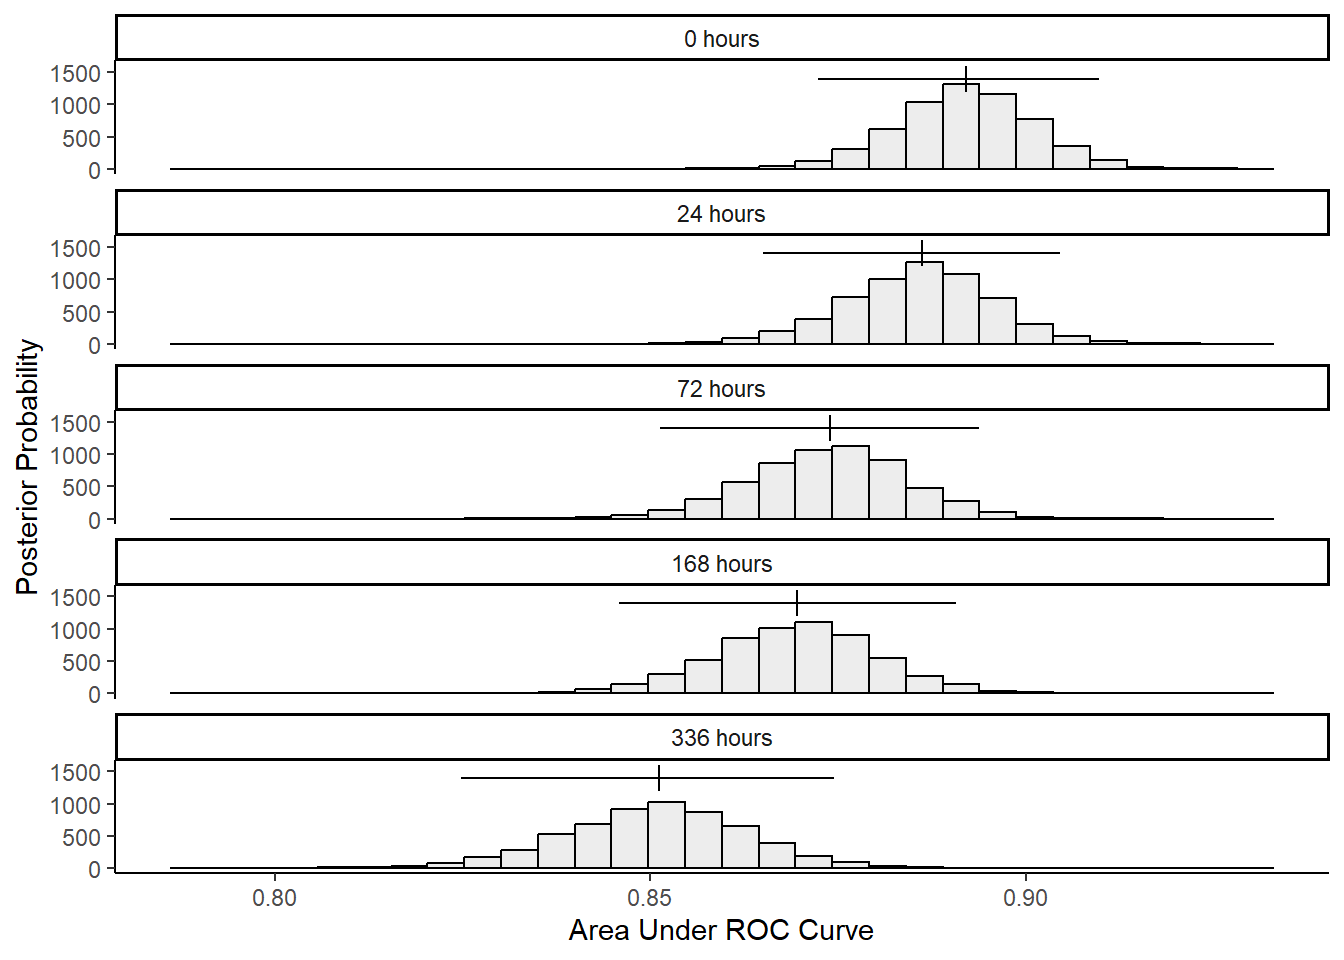

In [ ]:
pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours"))) |>
  ggplot() + 
  geom_histogram(aes(x = posterior), fill = "light grey", color = "black", alpha = .4, 
                 bins = 30) +
  geom_segment(mapping = aes(y = 1200, yend = 1600, x = pp_median, xend = pp_median),
               data = ci) +
  geom_segment(mapping = aes(y = 1400, yend = 1400, x = pp_lower, xend = pp_upper),
                data = ci) +
  facet_wrap(~model, ncol = 1) +
  scale_y_continuous("Posterior Probability", breaks = c(0, 500, 1000, 1500)) +
  xlab("Area Under ROC Curve") +
  theme_classic() +
  theme(legend.position = "none")


### Figure S2: Global Shapley Plot

Read in data

In [ ]:
global_all <- read_rds(here::here(path_models_lag, "shap_global_all.rds")) |> 
   filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |> 
   mutate(variable_grp = reorder(variable_grp, mean_value, sum),
          model = factor(model, c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag")))

shap_levels <- global_all |>
  mutate(variable_grp = reorder(variable_grp, mean_value, sum)) |>
  pull(variable_grp) |>
  levels()


Global shapley pannel

In [ ]:
color_codes <- c("#240e31","#75f3d3", "#458892", "#751c6d", "#cb6bce")

panel_shap_global <- global_all |>
   mutate(model = factor(model, levels = c("336 lag", "168 lag", "72 lag", "24 lag", "0 lag" ),
                         labels = c("336 hours", "168 hours", "72 hours", "24 hours", "0 hours" ))) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, fill = model), stat = "identity") +
  ylab("Mean(|Shapley Value|)") +
  xlab("") +
  labs(fill = "Model Lag") +
  scale_color_manual(values = color_codes) +
  scale_fill_manual(values = color_codes) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        # legend.key.size = unit(.3, 'cm'),
        ) +
  coord_flip()


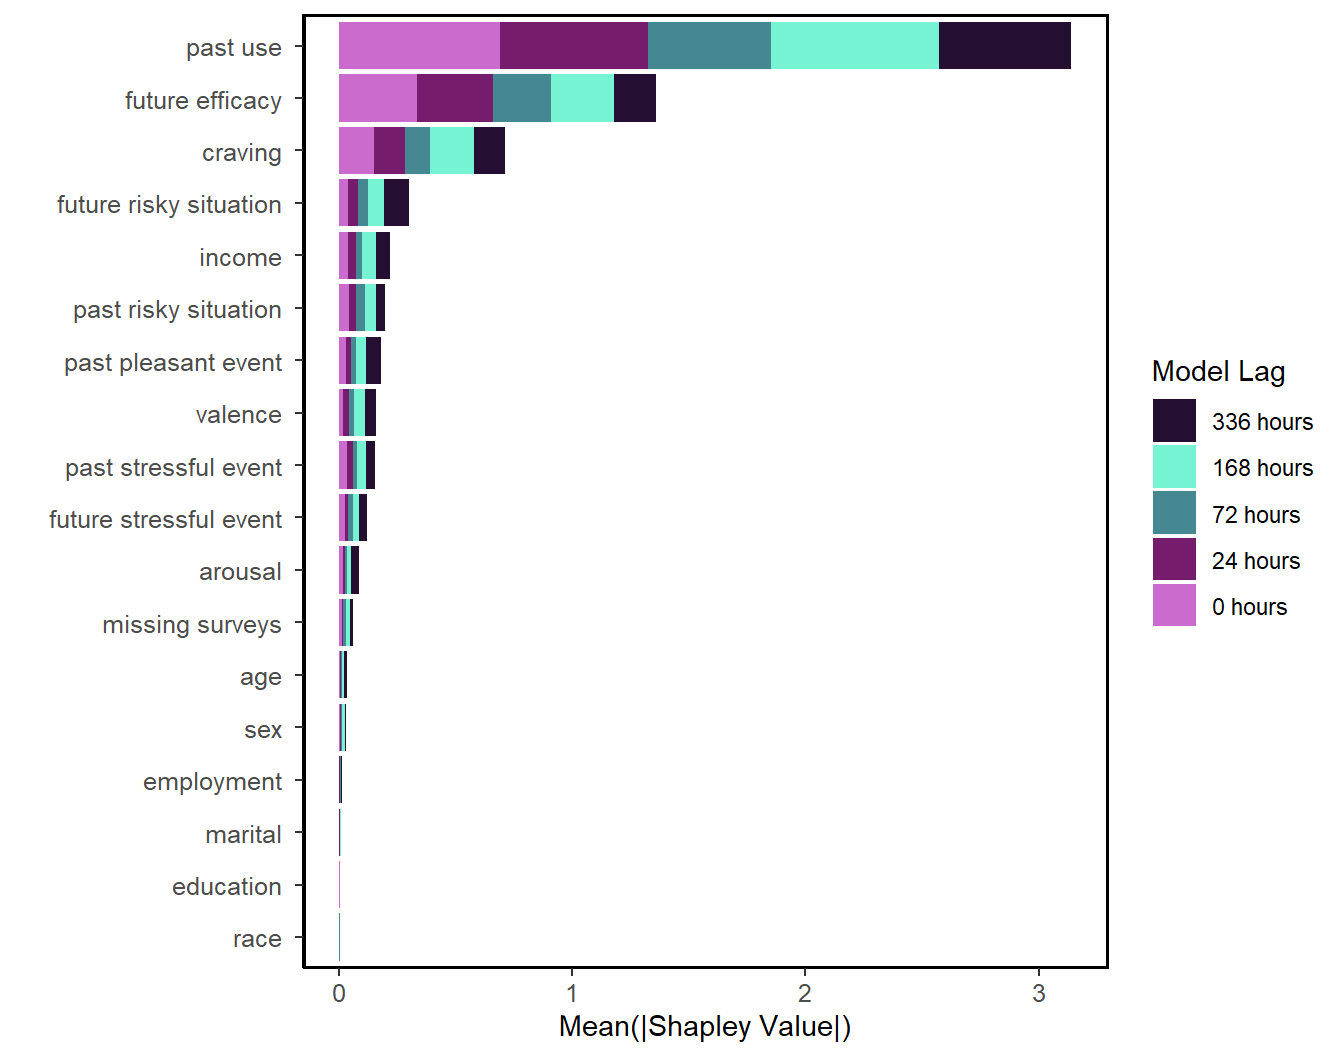

In [ ]:

panel_shap_global


### Figure S3: Global Shapley Plots by Demographic Group

For No lag model

In [ ]:
feat <- read_csv(here::here(path_processed, 
                            "features_0lag_v1.csv.xz"),
                 col_types = cols()) |> 
  select(label_num, subid, dttm_label, lapse, demo_age, demo_sex, 
         demo_income, demo_race) |> 
  arrange(label_num) 

shaps <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_0_v1_nested_main.rds"))


In [ ]:
global_feat_0 <- feat |> 
  rename(id_obs = label_num) |>
  right_join(shaps, by = c("id_obs")) |> 
  filter(model == "0 lag")


Sex

In [ ]:
global_male <- global_feat_0 |> 
  filter(demo_sex == "Male") |> 
  group_by(variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), stat = "identity") +
  labs(title = "Male",
       y = "Mean(|Shapley Value|)",
       x = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        ) +
  coord_flip()

global_female <- global_feat_0 |> 
  filter(demo_sex == "Female") |> 
  group_by(variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), stat = "identity") +
  labs(title = "Female",
       y = "Mean(|Shapley Value|)",
       x = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        ) +
  coord_flip()


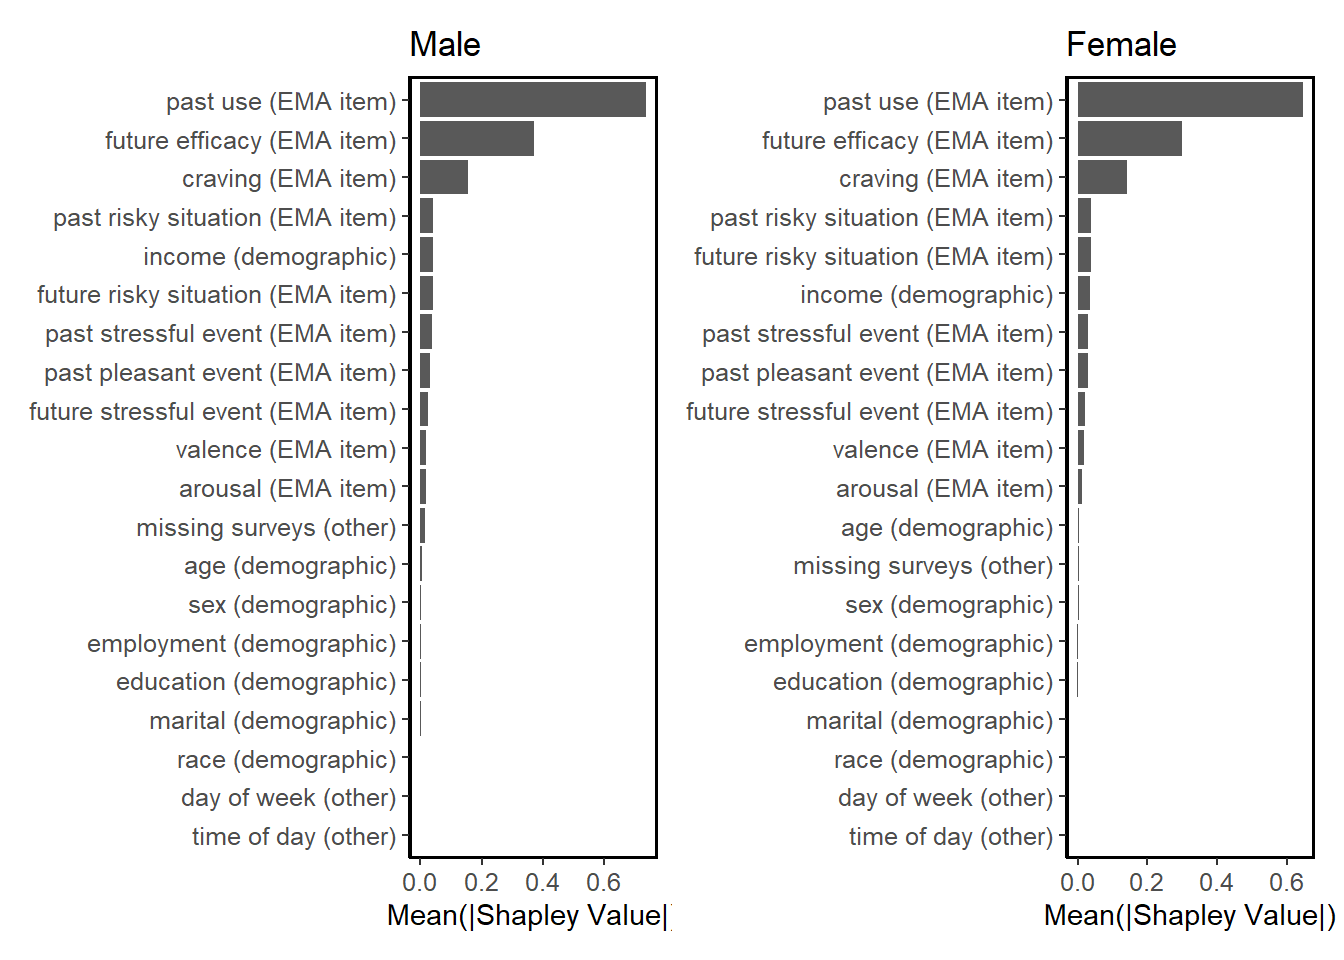

In [ ]:
global_male + global_female


Race

In [ ]:
global_white <- global_feat_0 |> 
  filter(demo_race == "White/Caucasian") |> 
  group_by(variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), stat = "identity") +
  labs(title = "Non-Hispanic White",
       y = "Mean(|Shapley Value|)",
       x = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        ) +
  coord_flip()

global_other <- global_feat_0 |> 
  filter(demo_race == "Other") |> 
  group_by(variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), stat = "identity") +
  labs(title = "Not White",
       y = "Mean(|Shapley Value|)",
       x = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        ) +
  coord_flip()


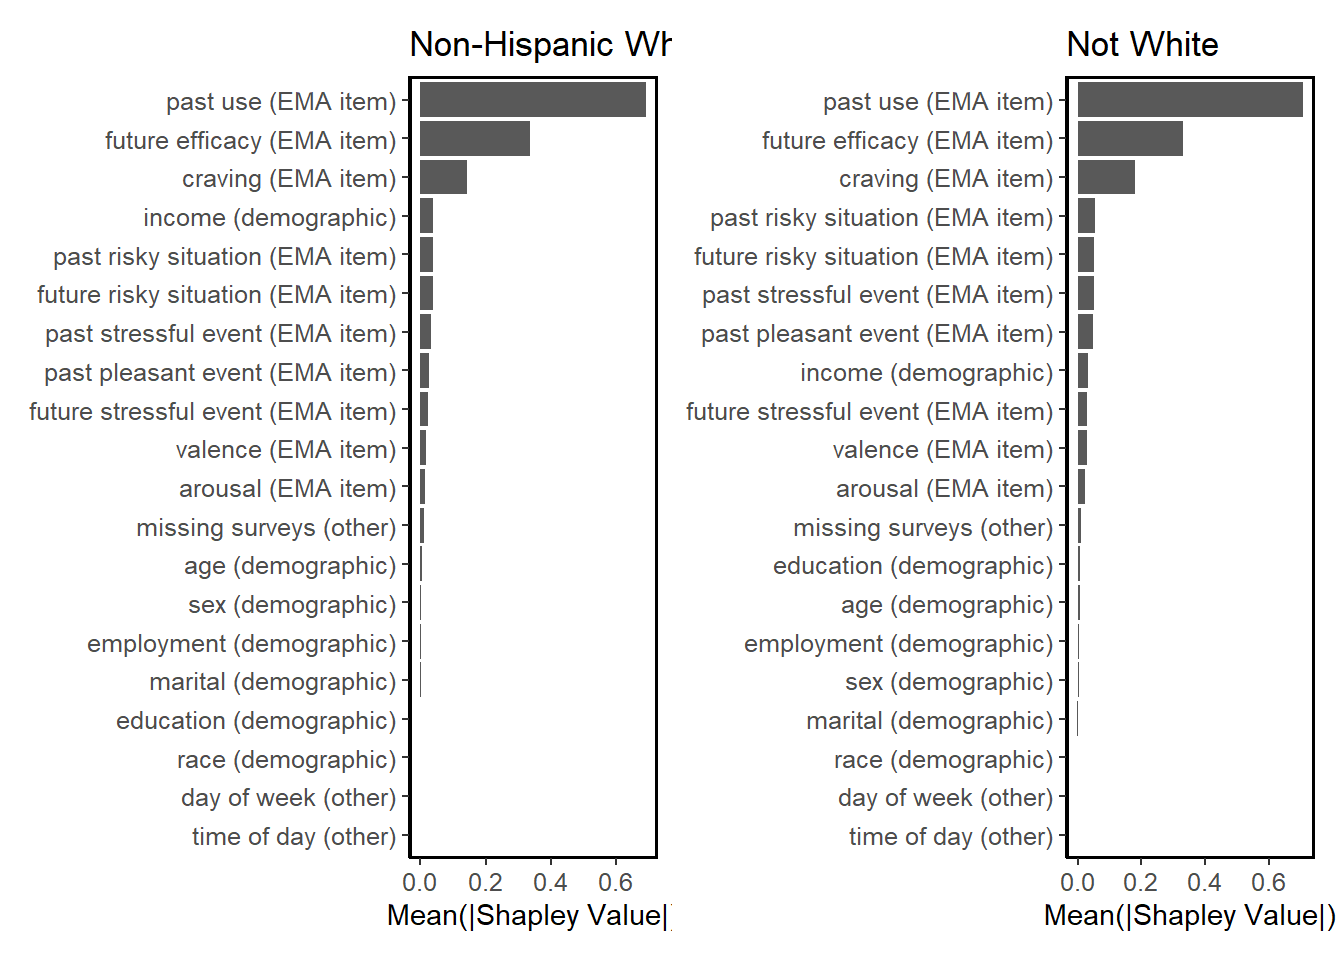

In [ ]:
global_white + global_other


Income

In [ ]:
global_above <- global_feat_0 |> 
  filter(demo_income >= 1560) |> 
  group_by(variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), stat = "identity") +
  labs(title = "Above Poverty",
       y = "Mean(|Shapley Value|)",
       x = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        ) +
  coord_flip()

global_below <- global_feat_0 |> 
  filter(demo_income < 1560) |> 
  group_by(variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value), stat = "identity") +
  labs(title = "Below Poverty",
       y = "Mean(|Shapley Value|)",
       x = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right",
        ) +
  coord_flip()


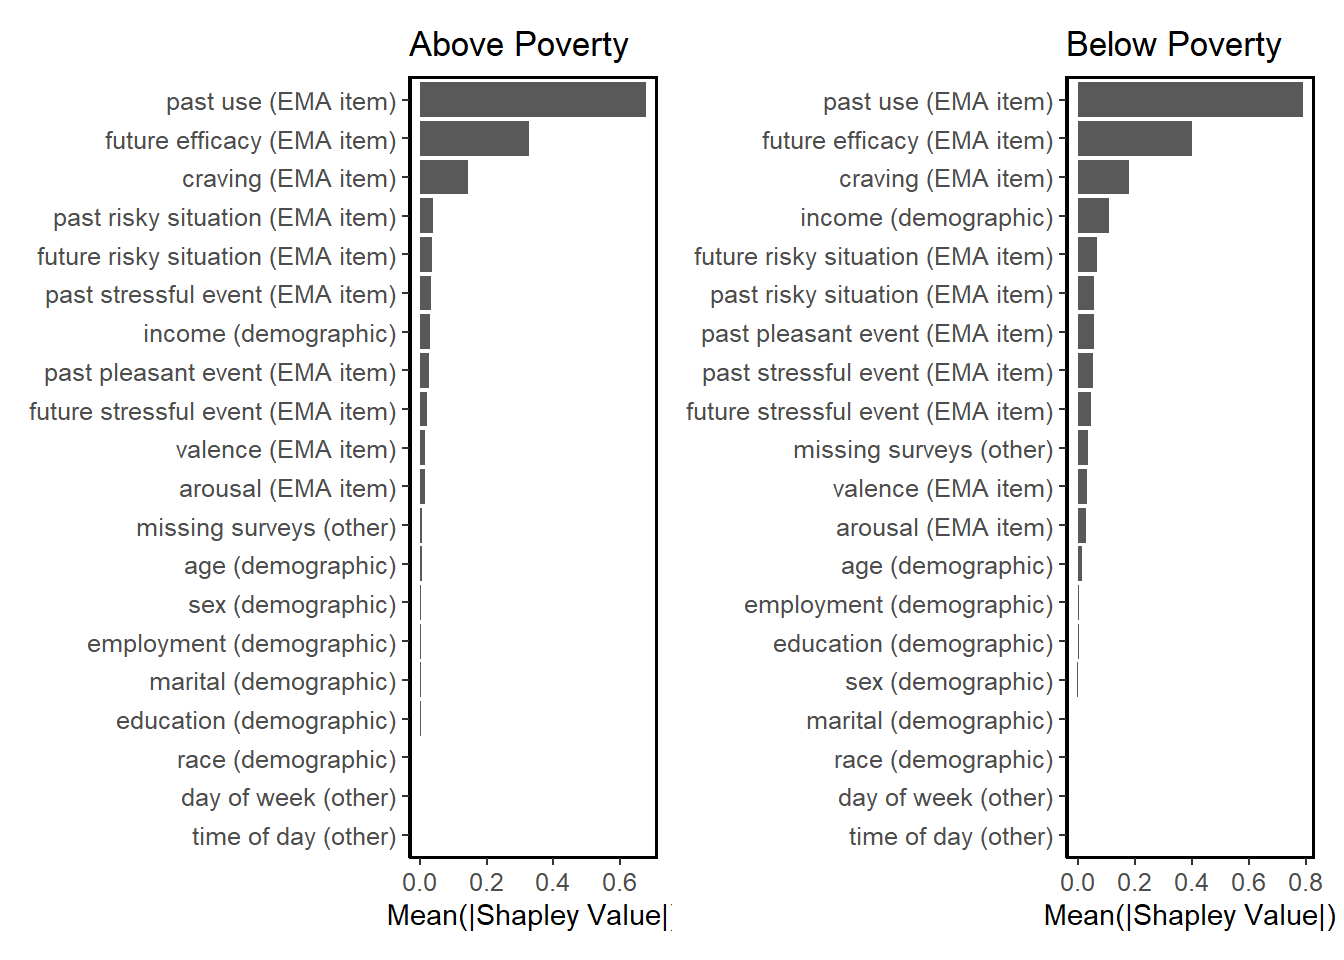

In [ ]:
global_above + global_below


### Figure S4: Local Shapley Plots by Model

In [ ]:

shap_feat_0 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_0_v1_nested_main_downsized.rds")) |> 
  filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |>
  mutate(variable_grp = factor(variable_grp, levels = shap_levels))
  
shap_feat_24 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_24_v1_nested_main_downsized.rds")) |> 
  filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |>
  mutate(variable_grp = factor(variable_grp, levels = shap_levels))

shap_feat_72 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_72_v1_nested_main_downsized.rds")) |> 
   filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |>
  mutate(variable_grp = factor(variable_grp, levels = shap_levels))

shap_feat_168 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_168_v1_nested_main_downsized.rds")) |> 
  filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |>
  mutate(variable_grp = factor(variable_grp, levels = shap_levels))

shap_feat_336 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_336_v1_nested_main_downsized.rds")) |> 
  filter(!variable_grp %in% c("day of week (other)", "time of day (other)")) |> 
  mutate(variable_grp = str_remove(variable_grp, "(EMA item)"),
          variable_grp = str_remove(variable_grp, "(demographic)"),
          variable_grp = str_remove(variable_grp, "(other)"),
        variable_grp = str_remove(variable_grp, "[[:punct:]][[:punct:]]")) |>
  mutate(variable_grp = factor(variable_grp, levels = shap_levels))


In [ ]:

panel_shap_local_0 <- shap_feat_0 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (0 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#cb6bce"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_24 <- shap_feat_24 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (24 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#922488"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_72 <- shap_feat_72 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (72 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#458892"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_168 <- shap_feat_168 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (168 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#75f3d3"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()


panel_shap_local_336 <- shap_feat_336 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (336 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#f9e79f"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()


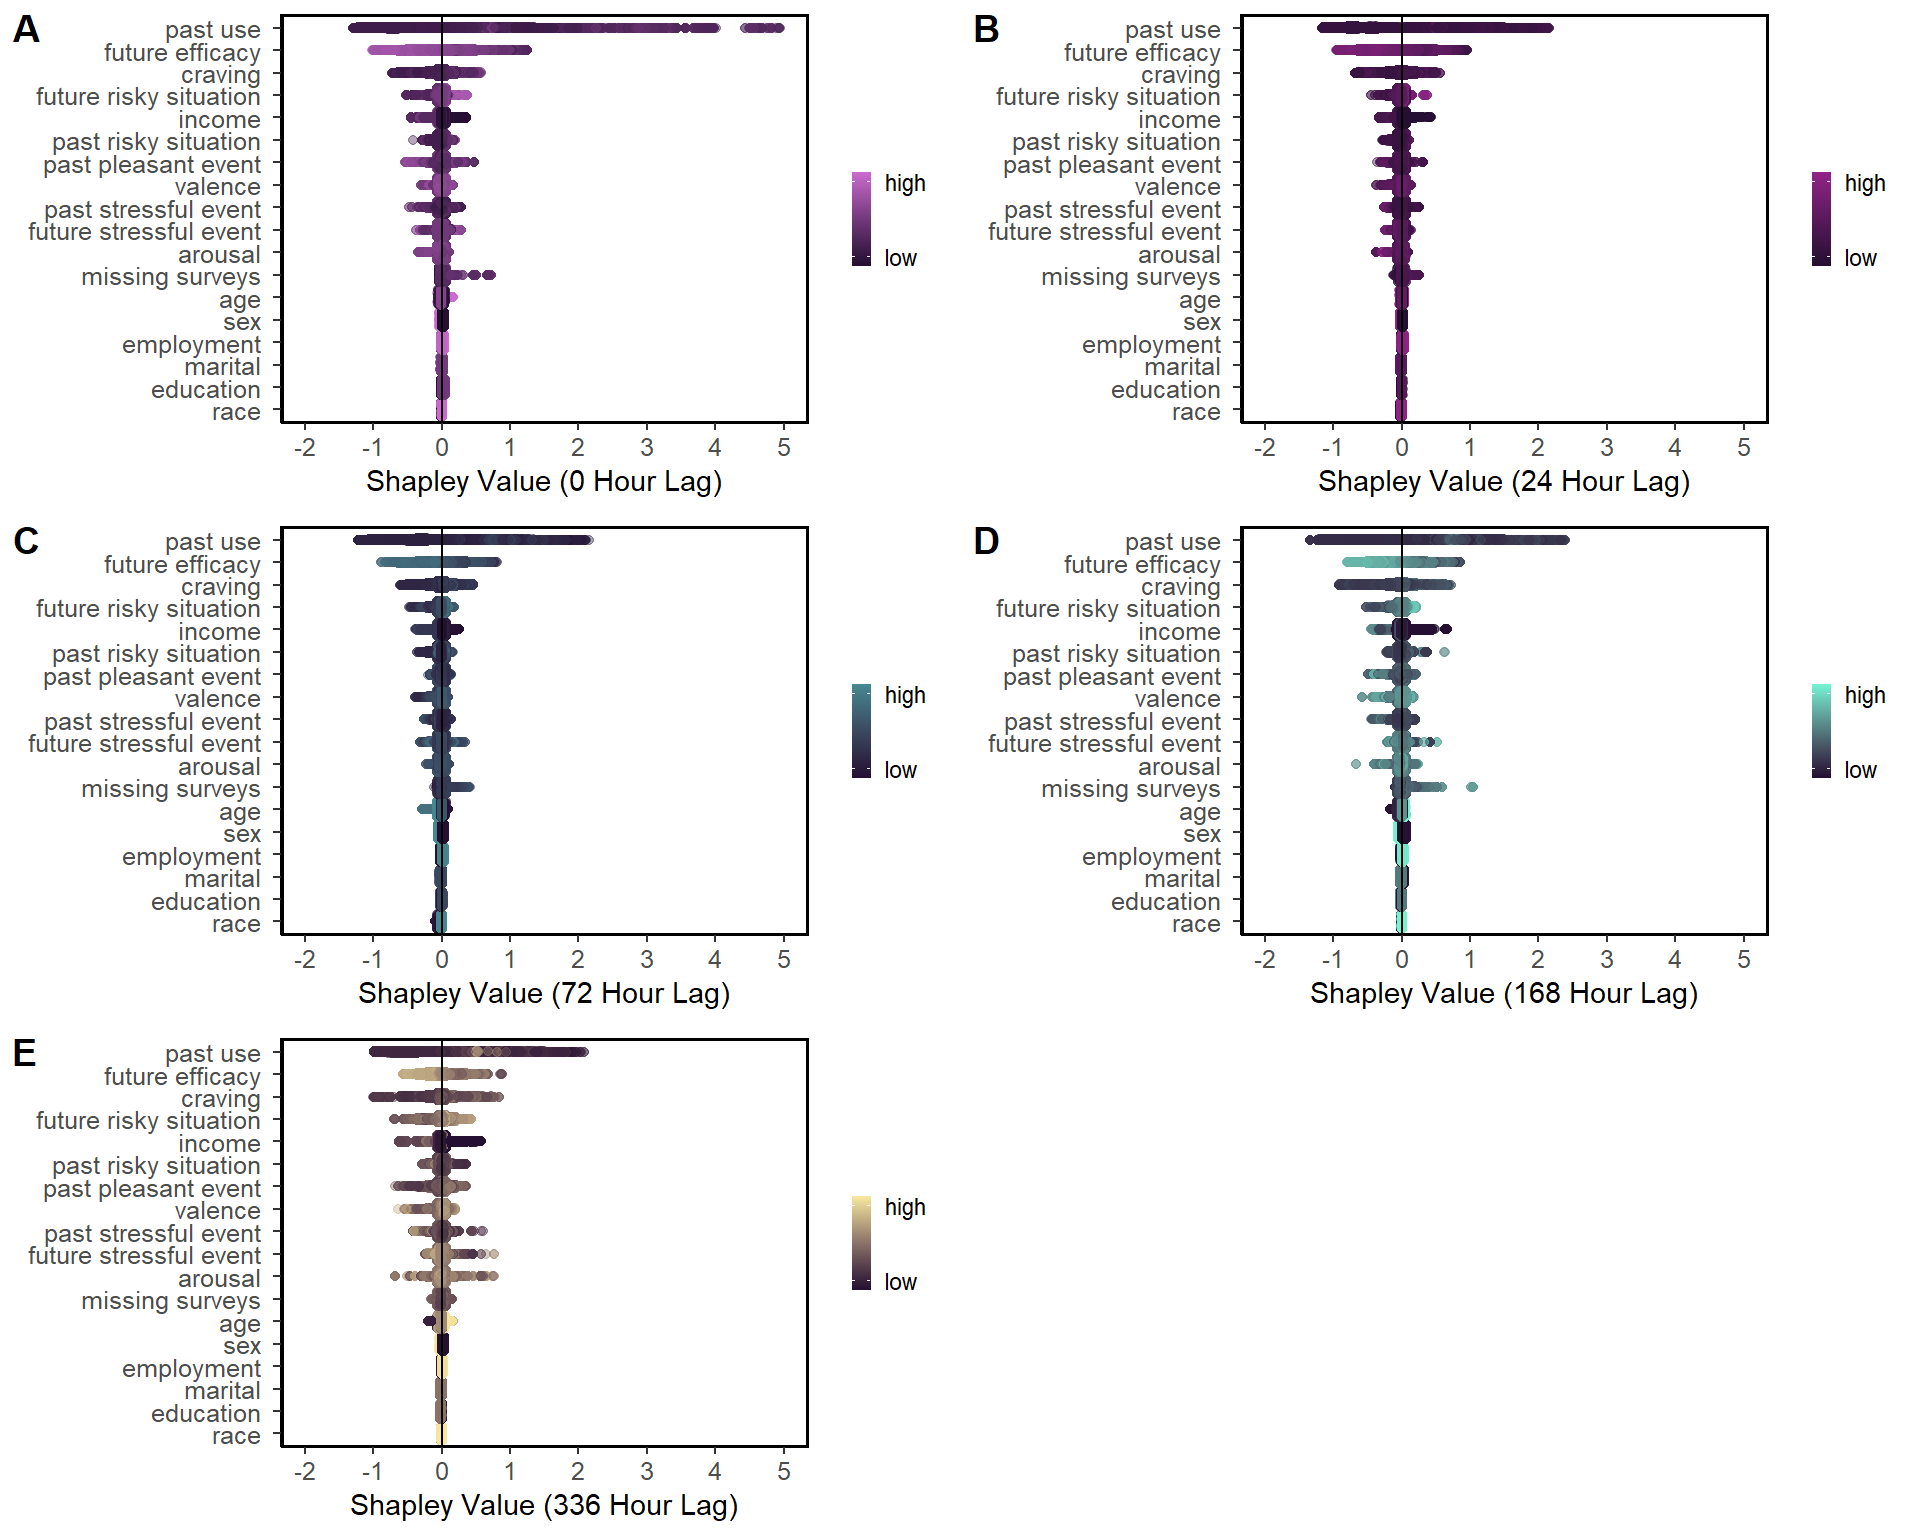

In [ ]:

cowplot::plot_grid(panel_shap_local_0,
                   panel_shap_local_24,
                   panel_shap_local_72, 
                   panel_shap_local_168,
                   panel_shap_local_336, 
                   ncol = 2, labels = c("A", "B", "C", "D", "E"), 
                   align = "hv")


### Figure S5: Individual Shapley Plots for Top Features

In [ ]:

shap_feat_all <- shap_feat_0 |> 
  mutate(model = "0 hours") |> 
  rbind(shap_feat_24 |> 
  mutate(model = "24 hours")) |> 
  rbind(shap_feat_72 |> 
  mutate(model = "72 hours")) |> 
  rbind(shap_feat_168 |> 
  mutate(model = "168 hours")) |> 
  rbind(shap_feat_336 |> 
  mutate(model = "336 hours")) |> 
  mutate(model = factor(model, levels = c("0 hours", "24 hours", "72 hours",
                                          "168 hours", "336 hours"))) 


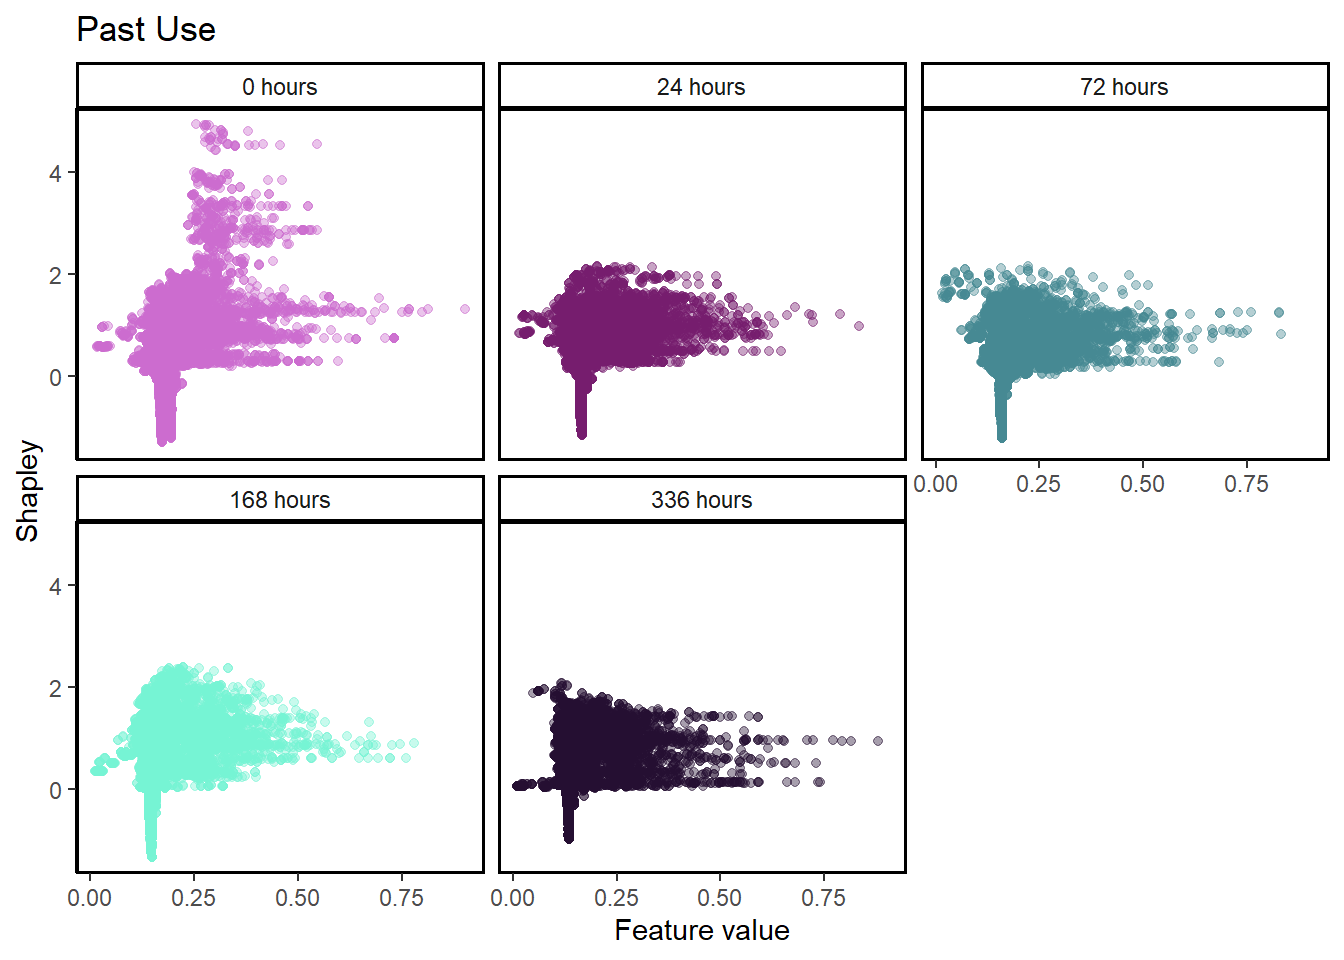

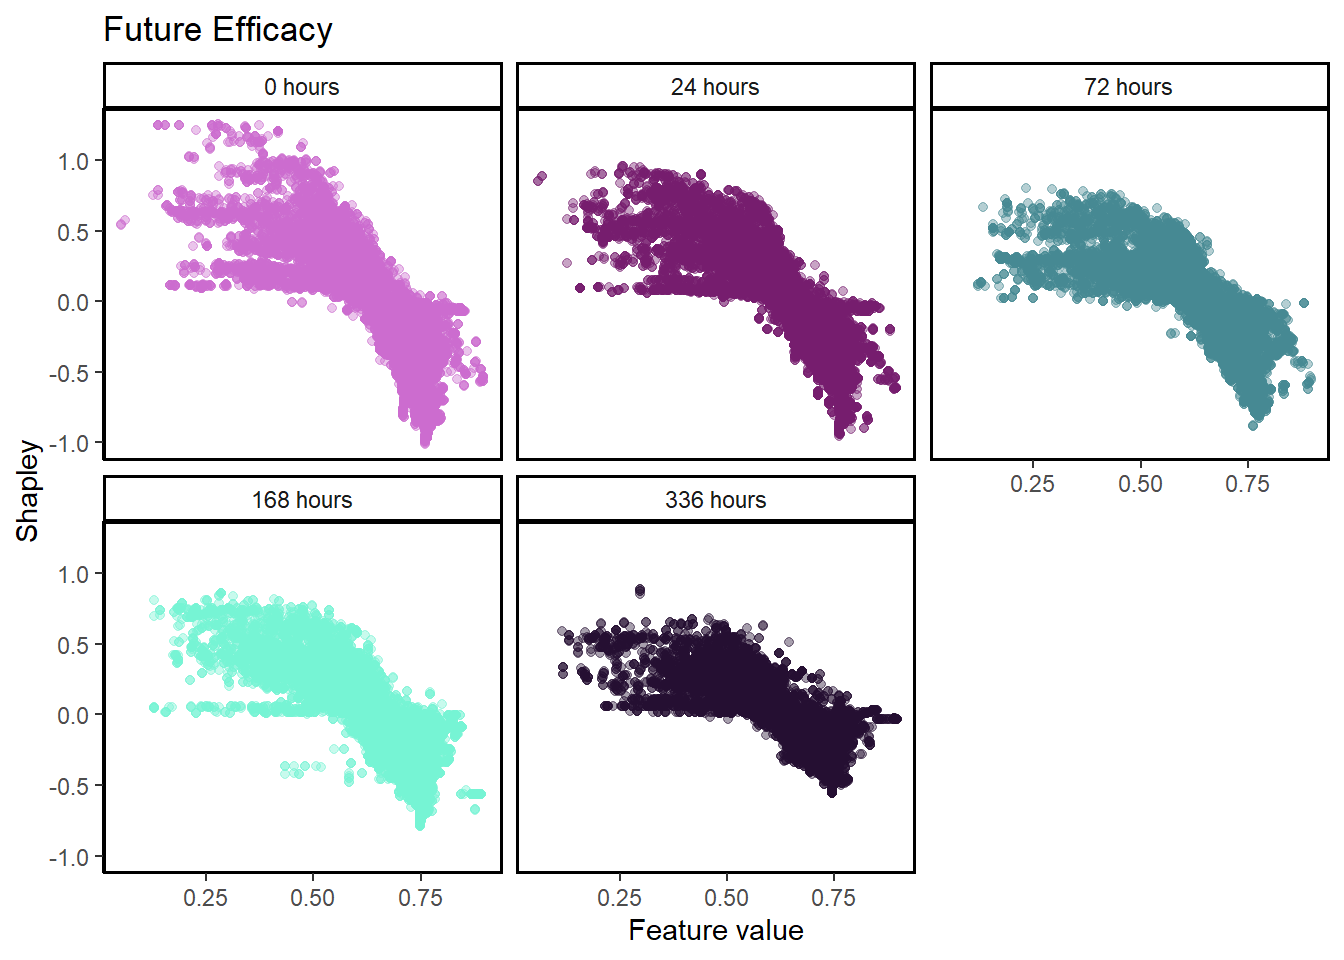

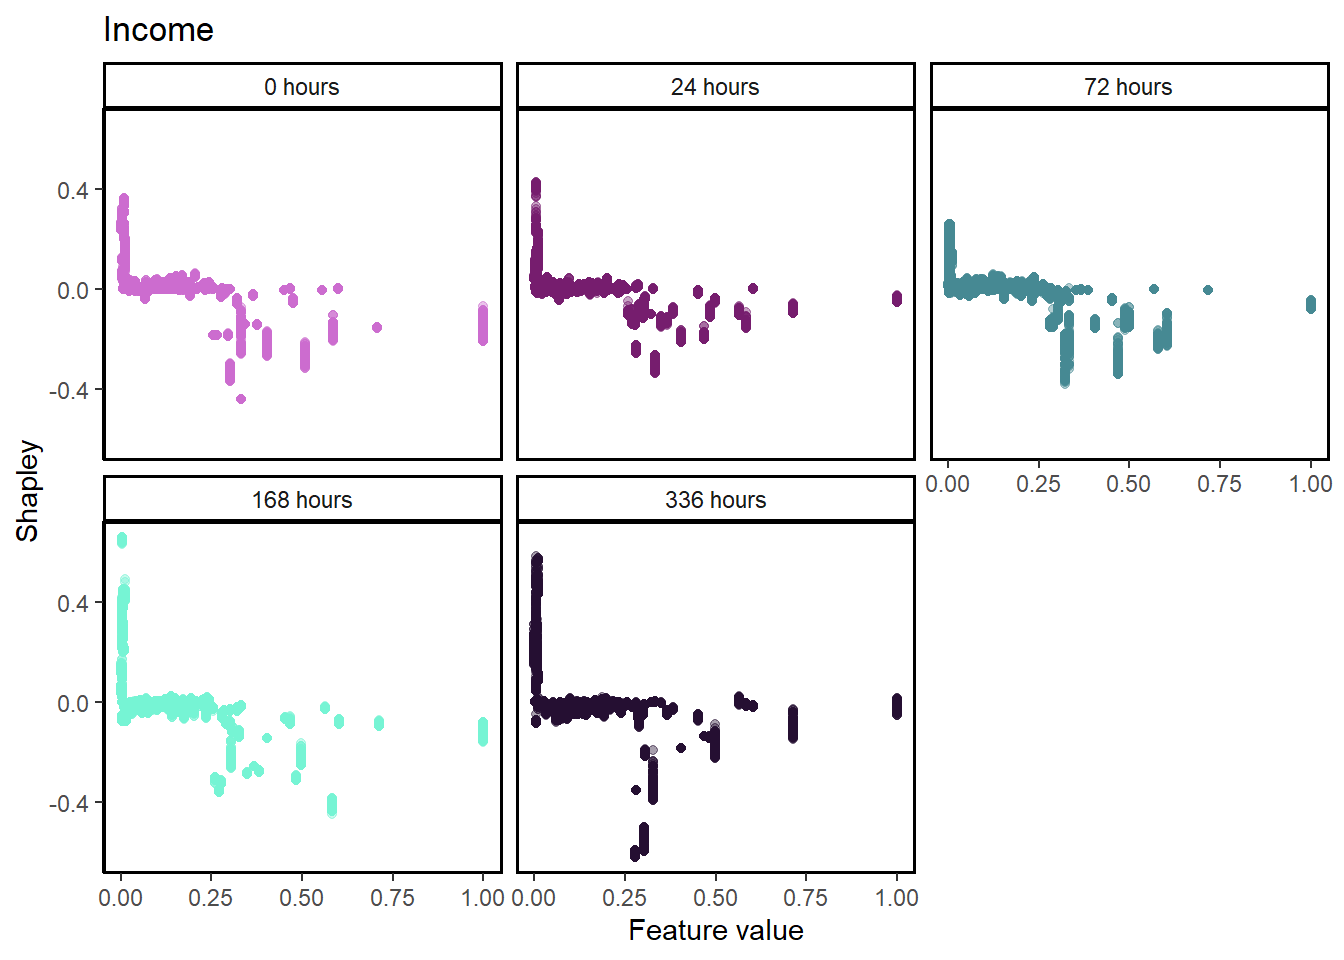

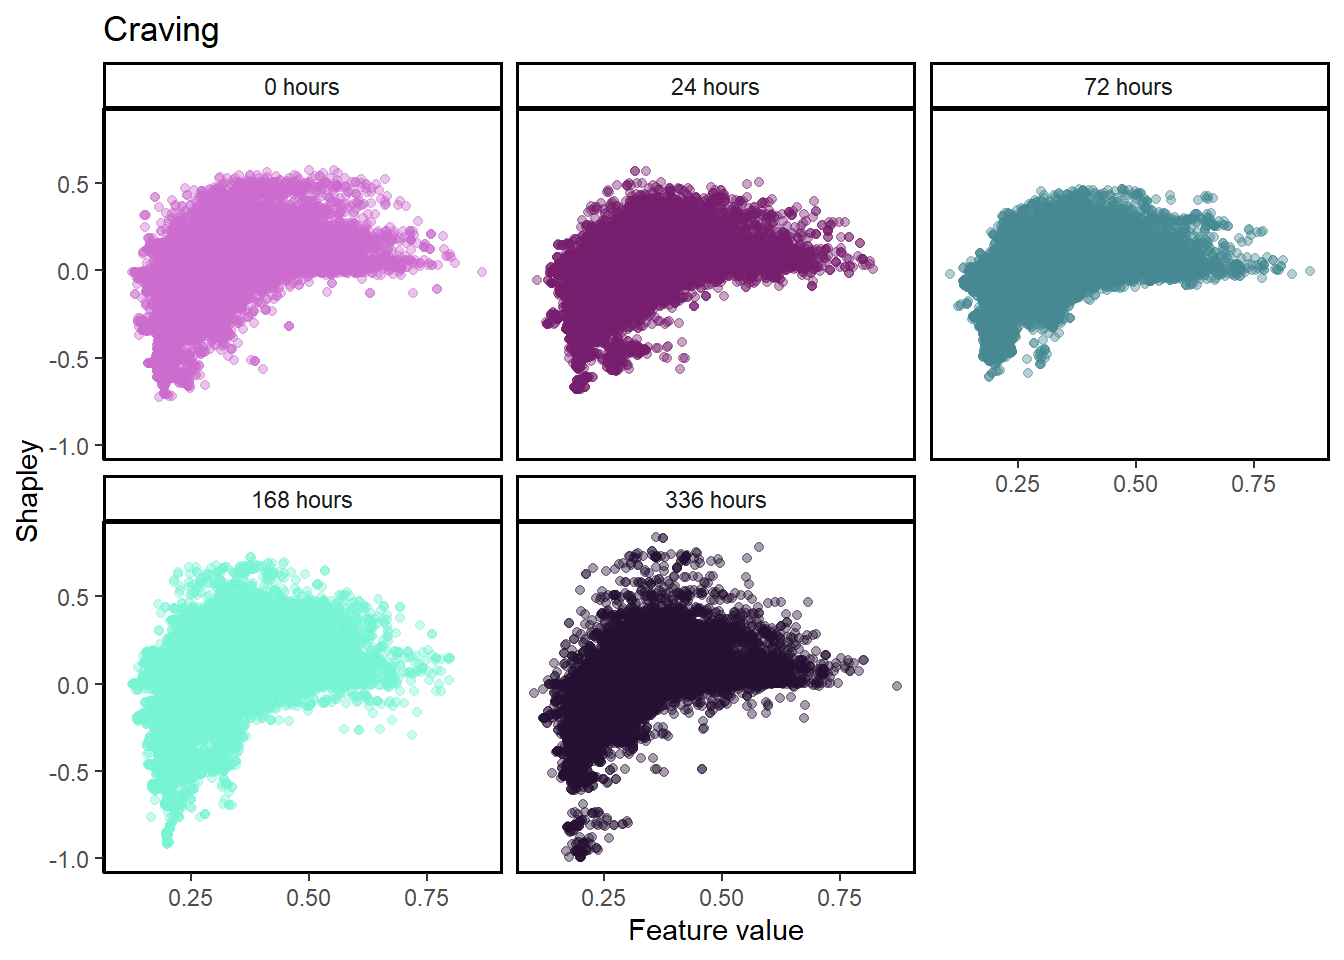

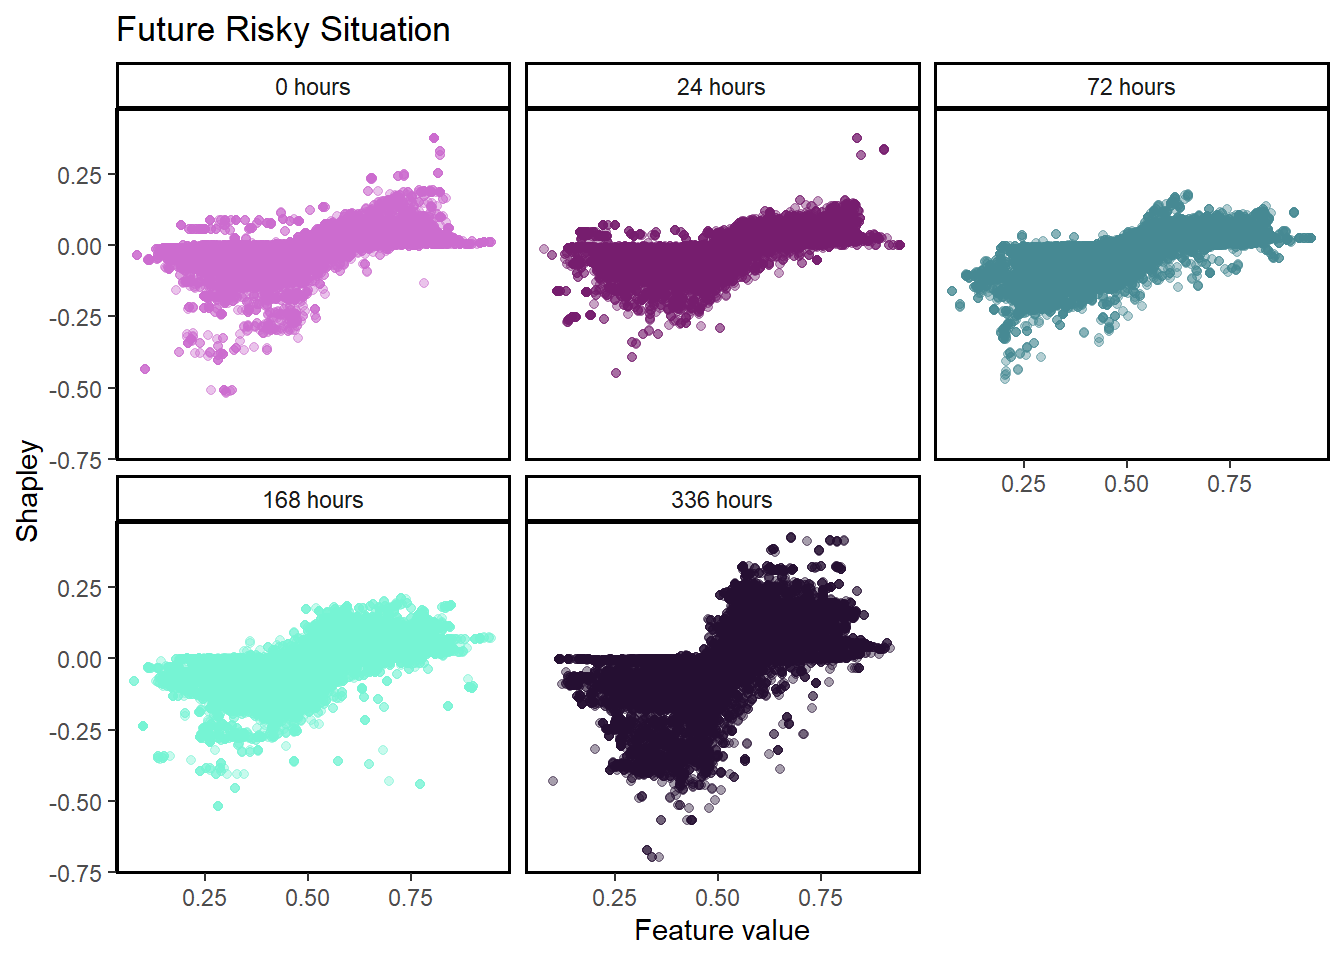

In [ ]:

color_codes <- c("#cb6bce", "#751c6d", "#458892", "#75f3d3", "#240e31")

shap_feat_all |> 
  filter(variable_grp == "past use ") |> 
  ggplot(aes(x = feature_value, y = shapley_value, color = model)) +
  geom_point(alpha = .4) +
  facet_wrap(~model) +
  scale_color_manual(values = color_codes) +
  labs(title = "Past Use", y = "Shapley", x = "Feature value") +
  theme(legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))


## Supplemental Tables

### Table S1: Model performance by Demographic Group

In [ ]:

pp_sex <- pp_dem_contrast |> 
  filter(contrast == "female vs male") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag (hours)`= lag,
         Median = median,
         `Bayesian CI` = ci,
         Probability = probability)

pp_income <- pp_dem_contrast |> 
  filter(contrast == "below poverty vs above poverty") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag (hours)`= lag,
         `Median ` = median,
         `Bayesian CI ` = ci,
         `Probability ` = probability)

pp_race <- pp_dem_contrast |> 
  filter(contrast == "not white vs non-hispanic white") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag (hours)`= lag,
         `Median  ` = median,
         `Bayesian CI  ` = ci,
         `Probability   ` = probability)

pp_sex |> 
  full_join(pp_income, by = "Lag (hours)") |> 
  full_join(pp_race, by = "Lag (hours)") |> 
  kbl() |> 
  add_header_above(c(" " = 1, "Race" = 3, "Sex" = 3, "Income" = 3))
